# "Unexplained variance" with and without systematic factors

## Overview

Is this difference explainable by chance alone? We think that a hypothesis test on<br>
its own answers this question. It doesn't. This sets up a decision tree with<br>
"chance" as an explanatory factor. What are the other branches? Be specific. Name<br>
variables. Explain whether those variables are measured and how.

The thing is, in order to know whether effects are explainable by chance alone,<br>
we need to know how much chance there is. We cannot know this without including all<br>
important systematic effects - trends, confounders, etc.

This example shows how different the "unexplained variance" can look when we do or<br>
don't incorporate all systematic factors. Remember that it is the unexplained variance<br>
in the sample that is used to infer the amount of variance/chance in any test<br>
statistic of interest

## Libraries

In [59]:
from dataclasses import dataclass
from typing import List, Union

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Classes and functions

In [61]:
@dataclass
class Params:
    num_rows: int
    alpha: float
    beta: List[float]
    sigma: float
    x_mean: float
    x_sigma: float

In [62]:
@dataclass
class SimulationData:
    x: Union[List[float], np.ndarray]
    y: Union[List[float], np.ndarray]
    underlying_relationship: Union[List[float], np.ndarray]

In [63]:
@dataclass
class CenteredData:
    y_centered: Union[List[float], np.ndarray]
    resids: Union[List[float], np.ndarray]

In [64]:
def generate_dataset(params: Params, seed=0) -> SimulationData:
    np.random.seed(seed)
    x = np.random.normal(loc=params.x_mean, scale=params.x_sigma, size=params.num_rows)
    underlying_relationship = params.alpha + params.beta * x
    y = underlying_relationship + np.random.normal(
        scale=params.sigma, size=params.num_rows
    )
    return SimulationData(x=x, y=y, underlying_relationship=underlying_relationship)

In [65]:
def plot_data(data: SimulationData, params: Params) -> None:
    title = f"Observed data and underlying relationship \n{params}"
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(data.x, data.y, "o", mfc="none", label="observed_data")
    ax.plot(data.x, data.underlying_relationship, label="underlying_relationship")
    ax.set_title(title, fontsize=8)
    ax.set_ylim(data.y.min() - 3, data.y.max() + 10)
    ax.set_xlim(data.x.min() - 0.5, data.x.max() + 0.5)
    ax.legend()
    fig.show()

In [66]:
def centered_data_distributions(
        data: SimulationData, thresh: float = 0.1
) -> CenteredData:
    # Unexplained variance without systematic factor
    y_centered = data.y - data.y.mean()

    # Unexplained variance with systematic factor
    X = data.x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, data.y)
    coeffs = model.coef_
    thresh = thresh
    assert abs(coeffs[0] - p.beta[0]) < thresh
    train_preds = model.predict(X)
    resids = data.y - train_preds
    return CenteredData(y_centered=y_centered, resids=resids)

In [67]:
def plot_unexplained_variances(data: CenteredData, params: Params) -> None:
    title = 'Comparing "unexplained variance" with and without systematic factor'
    title += f'\n{params}'
    subtitles = ["Without systematic factor", "With systematic factor"]
    fig = plt.figure(figsize=(10, 7))
    for index, var in enumerate([data.y_centered, data.resids]):
        ax = plt.subplot(2, 1, index + 1)
        ax.hist(var)
        ax.set_xlim(-15, 15)
        ax.set_title(subtitles[index])
    plt.suptitle(title, fontweight="bold", fontsize=8)
    fig.tight_layout()
    fig.show()

## Single simulation run

C:\Users\vr229e\AppData\Local\Temp\ipykernel_37804\83005474.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


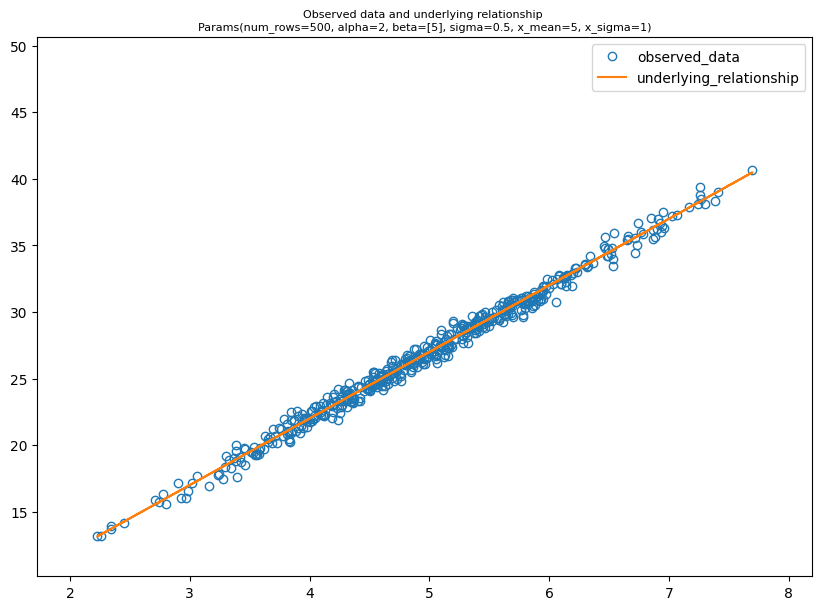

In [68]:
p = Params(num_rows=500, alpha=2, beta=[5], sigma=0.5, x_mean=5, x_sigma=1)
data = generate_dataset(params=p)
plot_data(data=data, params=p)

## Set up data for comparison

In [69]:
centered_data = centered_data_distributions(data)

## Comparison plots

C:\Users\vr229e\AppData\Local\Temp\ipykernel_37804\1393211310.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


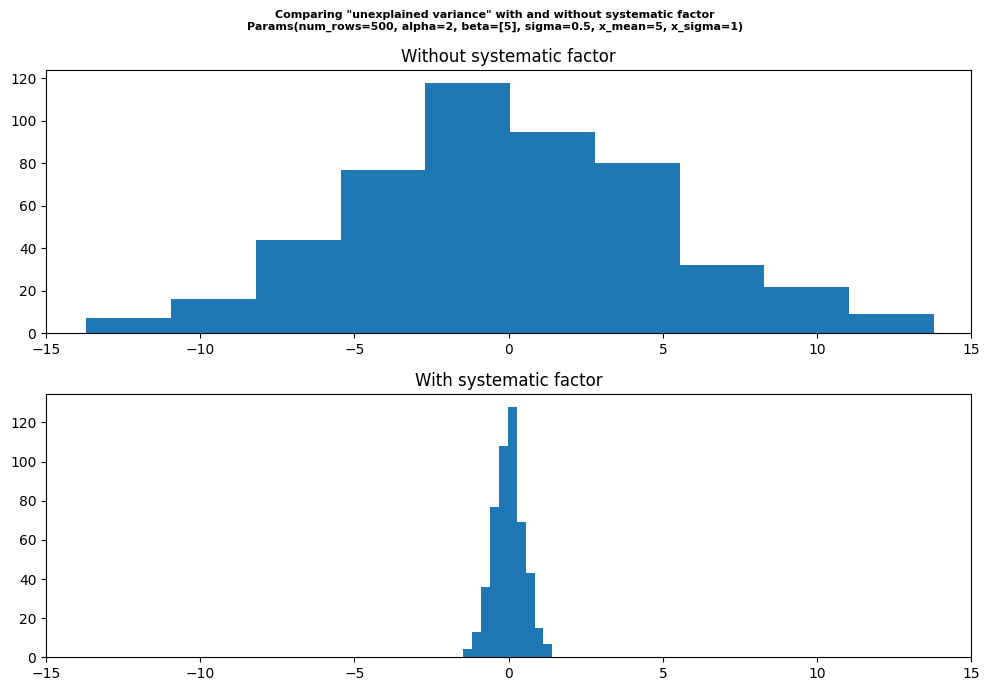

In [70]:
plot_unexplained_variances(data=centered_data, params=p)

## Multiple runs

In [71]:
p = Params(num_rows=500, alpha=2, beta=[5], sigma=0.5, x_mean=5, x_sigma=1)
p2 = Params(num_rows=500, alpha=2, beta=[0], sigma=0.5, x_mean=5, x_sigma=1)
p3 = Params(num_rows=40, alpha=2, beta=[5], sigma=0.5, x_mean=5, x_sigma=1)
p4 = Params(num_rows=40, alpha=2, beta=[5], sigma=0.01, x_mean=5, x_sigma=.1)
p5 = Params(num_rows=500, alpha=2, beta=[0.2], sigma=0.5, x_mean=5, x_sigma=1)

C:\Users\vr229e\AppData\Local\Temp\ipykernel_37804\83005474.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\vr229e\AppData\Local\Temp\ipykernel_37804\1393211310.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\vr229e\AppData\Local\Temp\ipykernel_37804\83005474.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\vr229e\AppData\Local\Temp\ipykernel_37804\1393211310.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\vr229e\AppData\Local\Temp\ipykernel_37804\83005474.py:10: UserWarning: Matplotlib is currently using mo

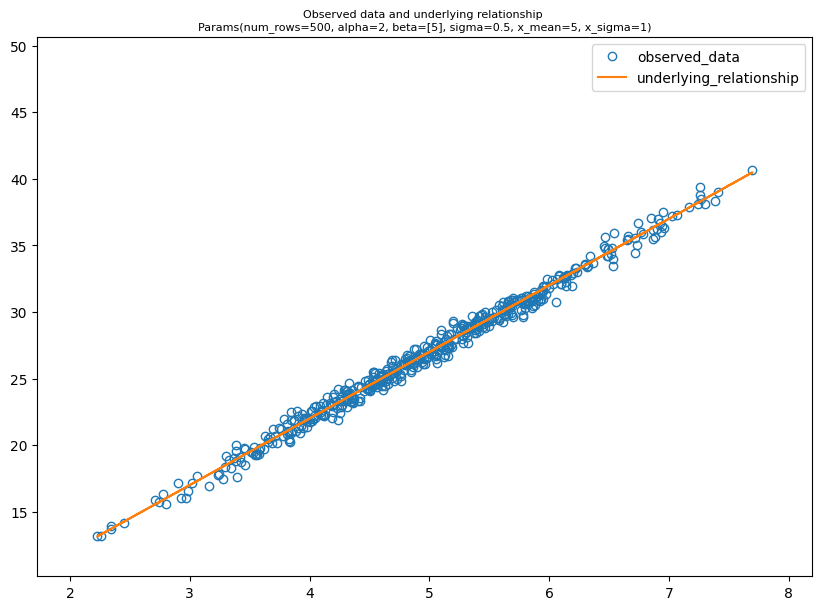

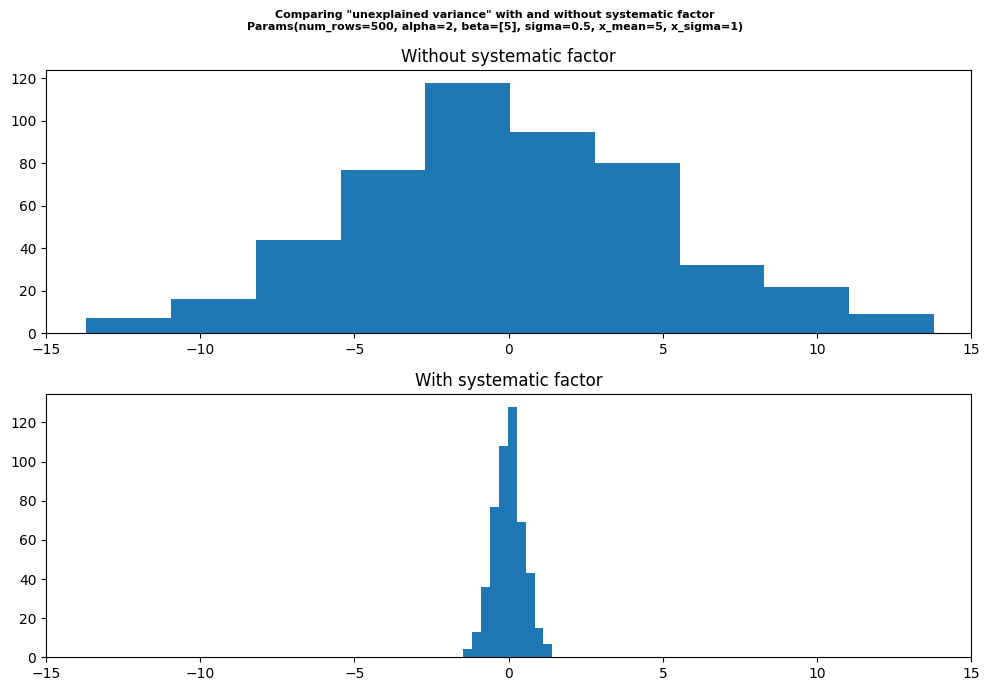

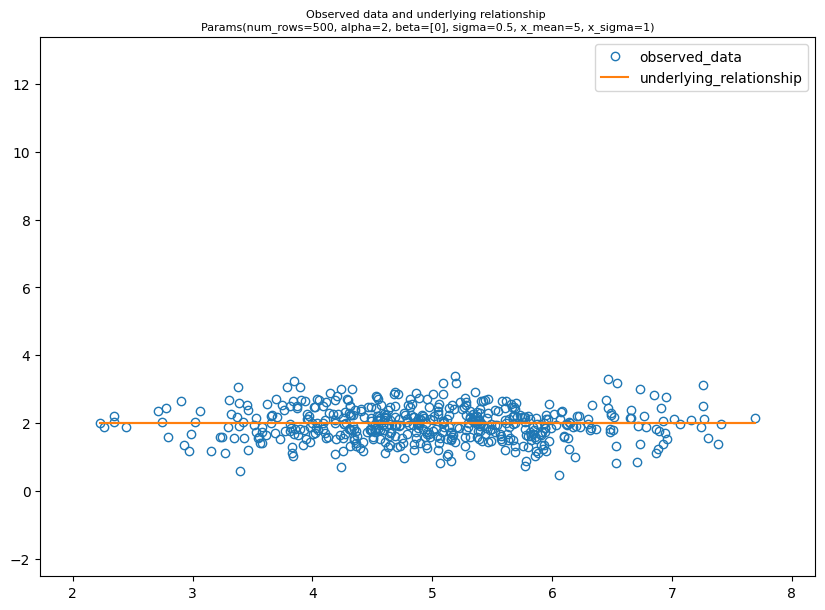

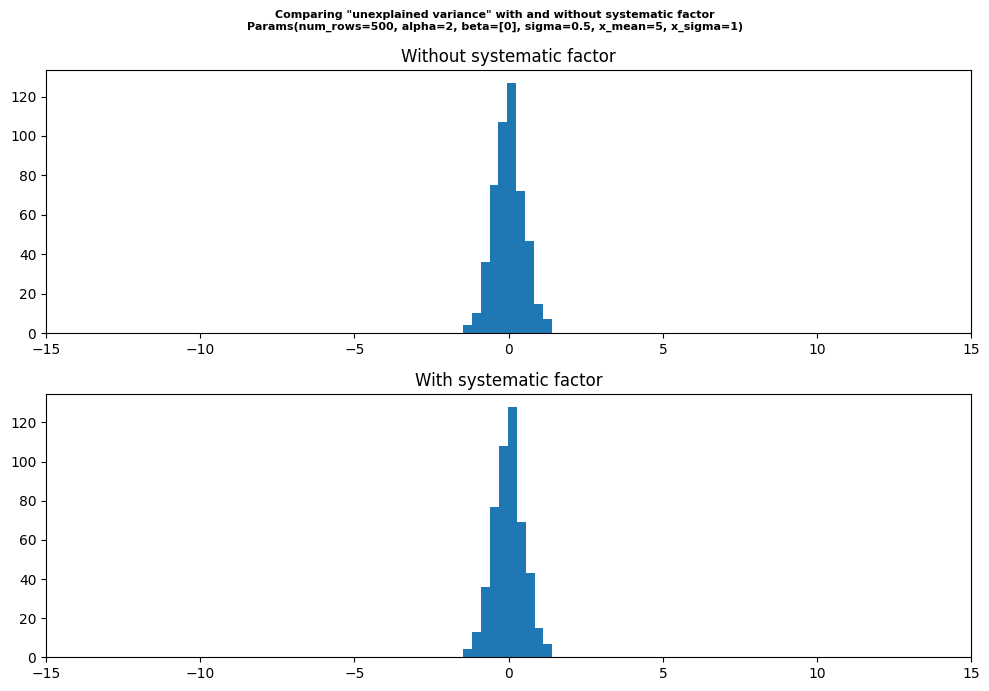

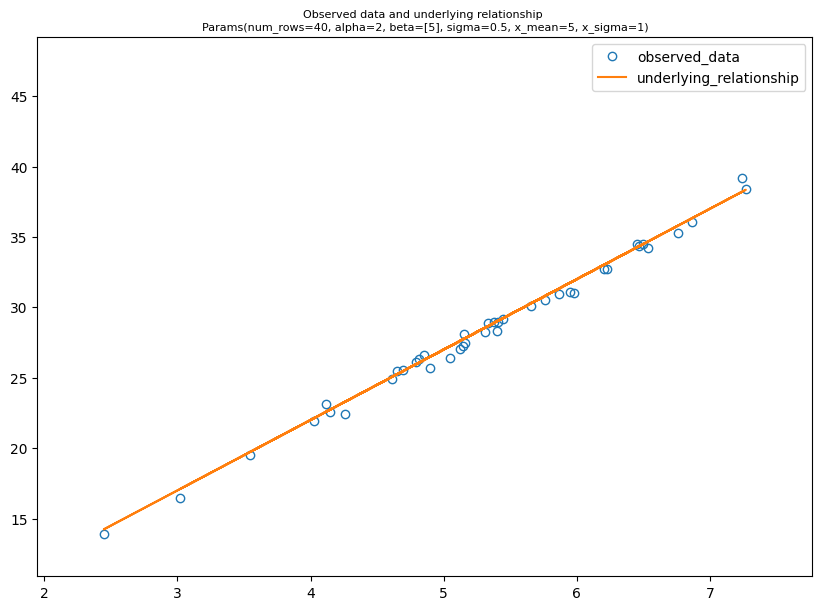

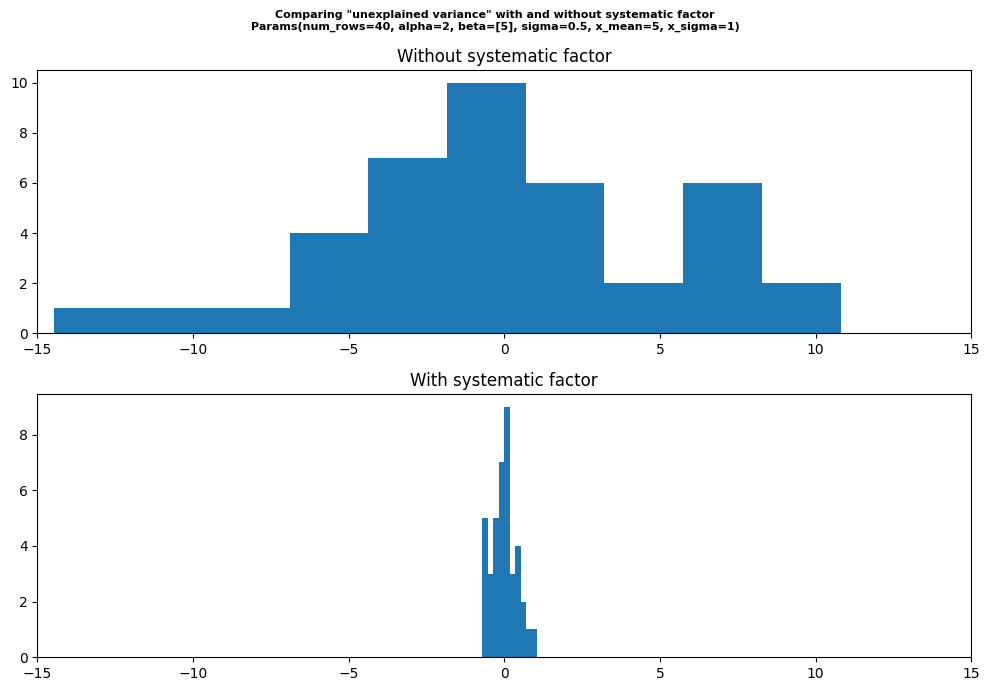

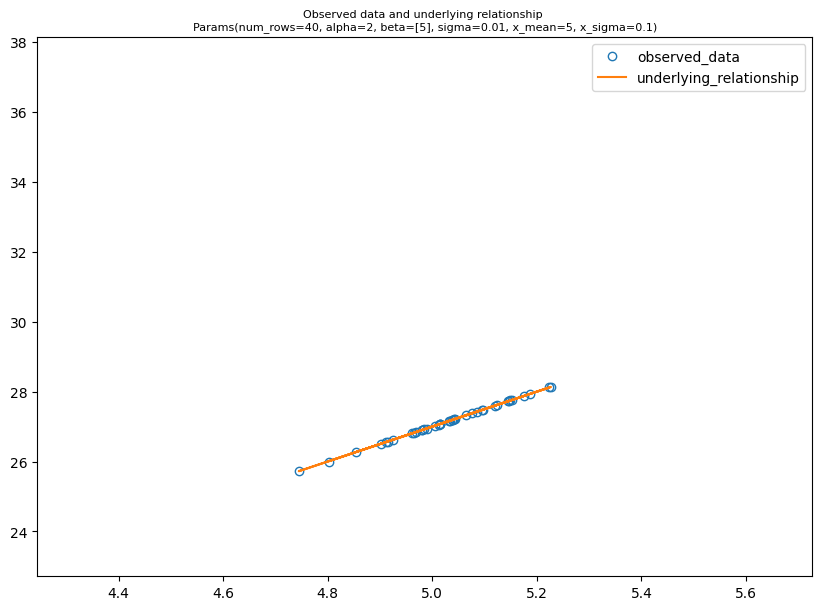

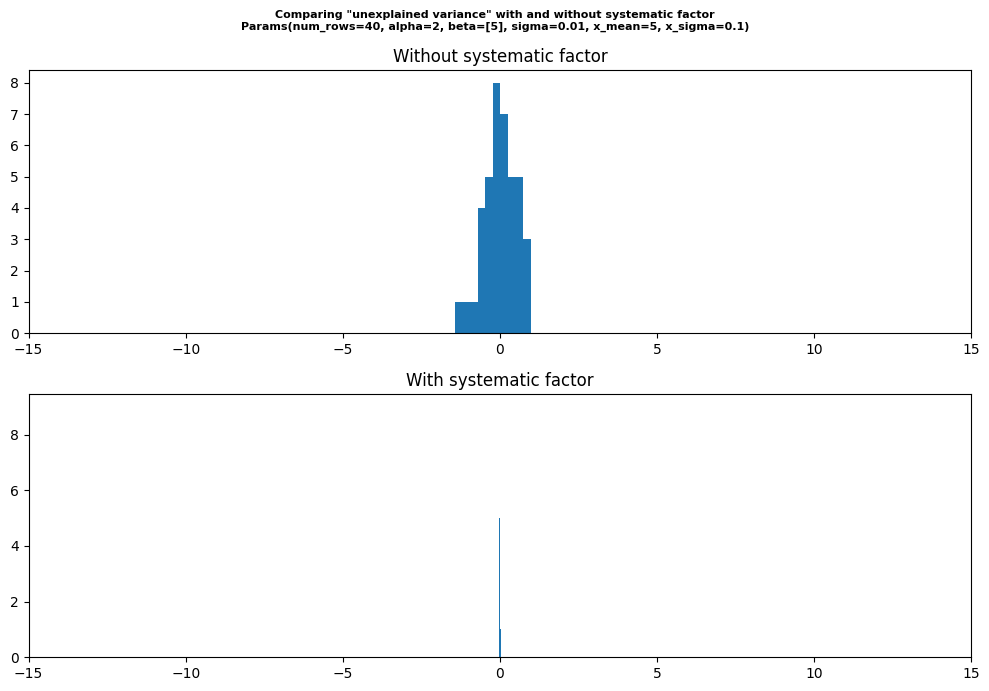

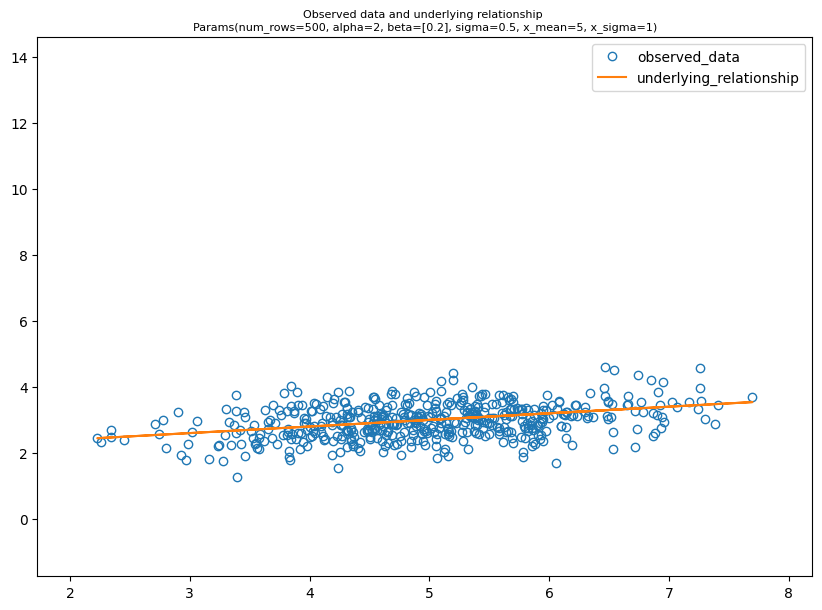

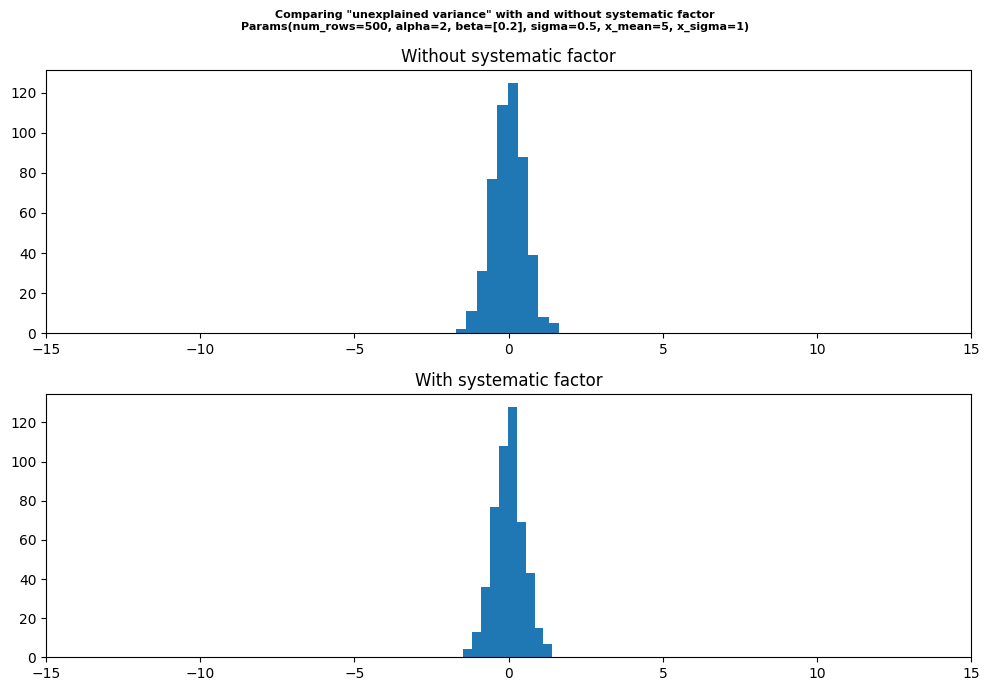

In [72]:
for param in [p, p2, p3, p4, p5]:
    data = generate_dataset(params=param)
    plot_data(data=data, params=param)
    centered_data = centered_data_distributions(data, thresh=50)
    plot_unexplained_variances(data=centered_data, params=param)